In [53]:
import pandas as pd
import prophet as Prophet
from datetime import datetime

In [57]:
ccc_sed = pd.read_csv('CSV/board-exam-results - CCC-SED.csv')

In [58]:
ccc_sed['Year'] = ccc_sed['Time Date'].apply(lambda x: str(x)[-4:])
ccc_sed['Month'] = ccc_sed['Time Date'].apply(lambda x: str(x)[-6:-4])
ccc_sed['Day'] = ccc_sed['Time Date'].apply(lambda x: str(x)[:-6])
ccc_sed['ds'] = pd.DatetimeIndex(ccc_sed['Year']+'-'+ccc_sed['Month']+'-'+ccc_sed['Day'])

In [59]:
ccc_sed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
ccc_sed.columns = ['y', 'ds']

In [60]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
ccc_sed_model = m.fit(ccc_sed)

18:27:53 - cmdstanpy - INFO - Chain [1] start processing
18:27:53 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
ccc_sed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
ccc_sed_forecast = m.predict(ccc_sed_future)
ccc_sed_forecast['yhat'] = ccc_sed_forecast['yhat'].clip(lower=0, upper=100).round()

In [62]:
ccc_sed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,33.0
1,2023-09-29,74.0
2,2024-03-24,51.0
3,2024-09-29,72.0
4,2025-03-24,43.0
5,2025-09-29,72.0
6,2026-03-24,37.0
7,2026-09-29,72.0
8,2027-03-24,30.0
9,2027-09-29,72.0


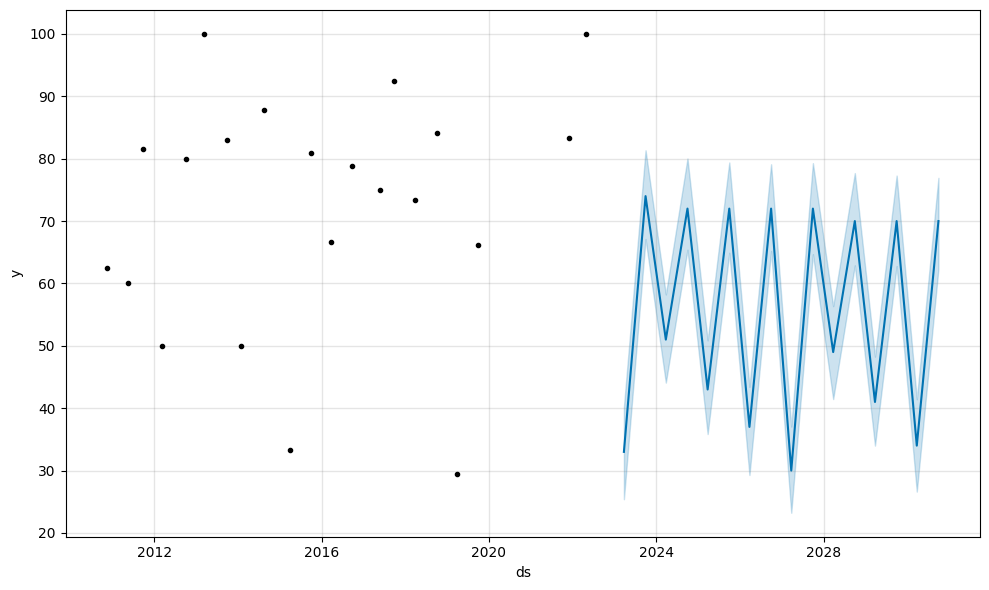

In [63]:
ccc_sed_plot = m.plot(ccc_sed_forecast)

In [64]:
cdc_sed = pd.read_csv('CSV/board-exam-results - CDC-SED.csv')

In [65]:
cdc_sed['Year'] = cdc_sed['Time Date'].apply(lambda x: str(x)[-4:])
cdc_sed['Month'] = cdc_sed['Time Date'].apply(lambda x: str(x)[-6:-4])
cdc_sed['Day'] = cdc_sed['Time Date'].apply(lambda x: str(x)[:-6])
cdc_sed['ds'] = pd.DatetimeIndex(cdc_sed['Year']+'-'+cdc_sed['Month']+'-'+cdc_sed['Day'])

In [66]:
cdc_sed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
cdc_sed.columns = ['y', 'ds']

In [67]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
cdc_sed_model = m.fit(cdc_sed)

18:34:32 - cmdstanpy - INFO - Chain [1] start processing
18:34:33 - cmdstanpy - INFO - Chain [1] done processing


In [71]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 11), datetime(2023, 4, 29), datetime(2024, 3, 11), datetime(2024, 4, 29), datetime(2025, 3, 11), datetime(2025, 4, 29), datetime(2026, 3, 11), datetime(2026, 4, 29), datetime(2027, 3, 11), datetime(2027, 4, 29), datetime(2028, 3, 11), datetime(2028, 4, 29), datetime(2029, 3, 11), datetime(2029, 4, 29), datetime(2030, 3, 11), datetime(2030, 4, 29)]

# Create a dataframe with those specific dates
cdc_sed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
cdc_sed_forecast = m.predict(cdc_sed_future)
cdc_sed_forecast['yhat'] = cdc_sed_forecast['yhat'].clip(lower=0, upper=100).round()

In [72]:
cdc_sed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-11,100.0
1,2023-04-29,100.0
2,2024-03-11,0.0
3,2024-04-29,24.0
4,2025-03-11,26.0
5,2025-04-29,43.0
6,2026-03-11,63.0
7,2026-04-29,64.0
8,2027-03-11,100.0
9,2027-04-29,85.0


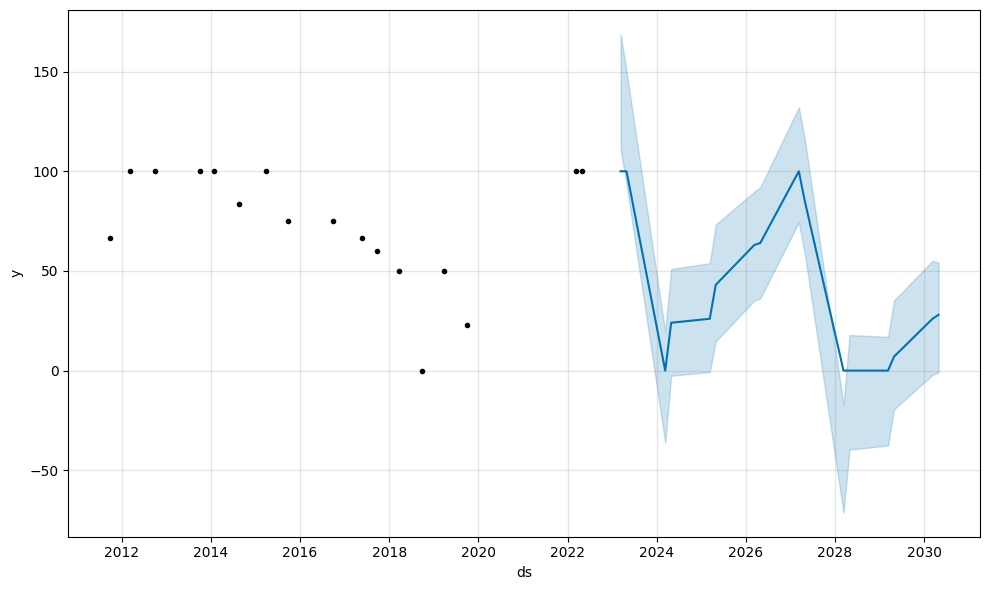

In [73]:
cdc_sed_plot = m.plot(cdc_sed_forecast)

In [74]:
lcba_sed = pd.read_csv('CSV/board-exam-results - LCBA - SED.csv')

In [75]:
lcba_sed['Year'] = lcba_sed['Time Date'].apply(lambda x: str(x)[-4:])
lcba_sed['Month'] = lcba_sed['Time Date'].apply(lambda x: str(x)[-6:-4])
lcba_sed['Day'] = lcba_sed['Time Date'].apply(lambda x: str(x)[:-6])
lcba_sed['ds'] = pd.DatetimeIndex(lcba_sed['Year']+'-'+lcba_sed['Month']+'-'+lcba_sed['Day'])

In [76]:
lcba_sed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
lcba_sed.columns = ['y', 'ds']

In [77]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
lcba_sed_model = m.fit(lcba_sed)

18:46:11 - cmdstanpy - INFO - Chain [1] start processing
18:46:11 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
lcba_sed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
lcba_sed_forecast = m.predict(lcba_sed_future)
lcba_sed_forecast['yhat'] = lcba_sed_forecast['yhat'].clip(lower=0, upper=100).round()

In [79]:
lcba_sed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,66.0
1,2023-09-29,69.0
2,2024-03-24,64.0
3,2024-09-29,83.0
4,2025-03-24,72.0
5,2025-09-29,85.0
6,2026-03-24,79.0
7,2026-09-29,87.0
8,2027-03-24,86.0
9,2027-09-29,90.0


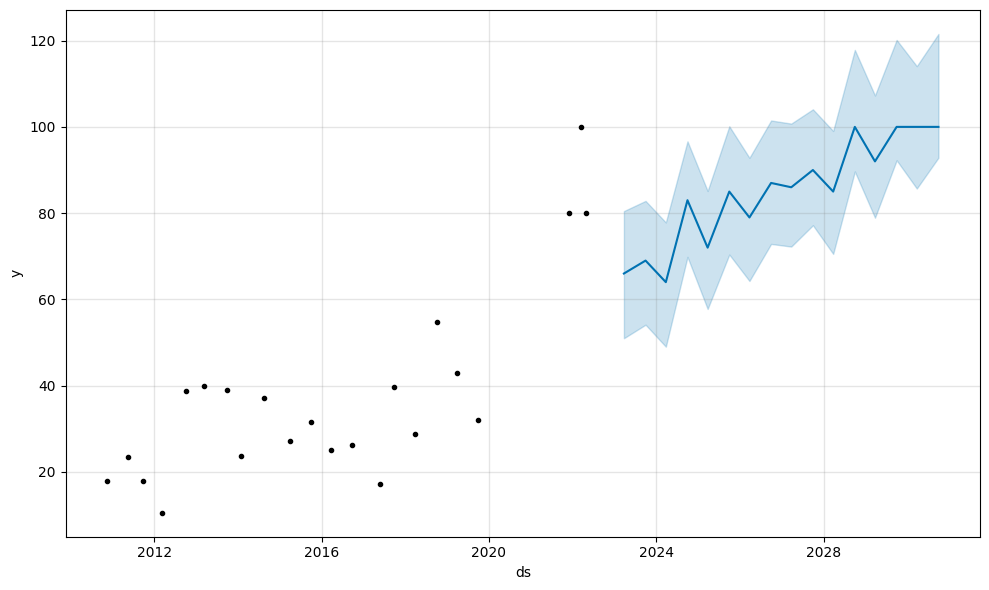

In [80]:
lcba_sed_plot = m.plot(lcba_sed_forecast)

In [88]:
letran_sed = pd.read_csv('CSV/board-exam-results - LETRAN-SED.csv')

In [89]:
letran_sed['Year'] = letran_sed['Time Date'].apply(lambda x: str(x)[-4:])
letran_sed['Month'] = letran_sed['Time Date'].apply(lambda x: str(x)[-6:-4])
letran_sed['Day'] = letran_sed['Time Date'].apply(lambda x: str(x)[:-6])
letran_sed['ds'] = pd.DatetimeIndex(letran_sed['Year']+'-'+letran_sed['Month']+'-'+letran_sed['Day'])

In [91]:
letran_sed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
letran_sed.columns = ['y', 'ds']

In [92]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
letran_sed_model = m.fit(letran_sed)

20:19:44 - cmdstanpy - INFO - Chain [1] start processing
20:19:52 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
letran_sed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
letran_sed_forecast = m.predict(letran_sed_future)
letran_sed_forecast['yhat'] = letran_sed_forecast['yhat'].clip(lower=0, upper=100).round()

In [94]:
letran_sed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,36.0
1,2023-09-29,70.0
2,2024-03-24,47.0
3,2024-09-29,77.0
4,2025-03-24,43.0
5,2025-09-29,75.0
6,2026-03-24,39.0
7,2026-09-29,72.0
8,2027-03-24,37.0
9,2027-09-29,70.0


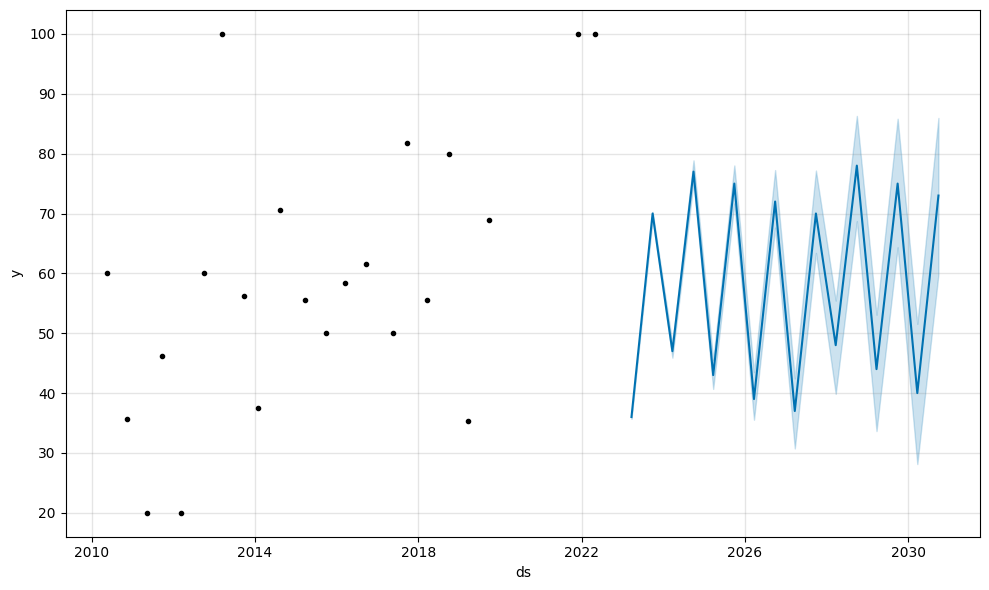

In [95]:
letran_sed_plot = m.plot(letran_sed_forecast)

In [96]:
sjc_sed = pd.read_csv('CSV/board-exam-results - SJC - SED.csv')

In [97]:
sjc_sed['Year'] = sjc_sed['Time Date'].apply(lambda x: str(x)[-4:])
sjc_sed['Month'] = sjc_sed['Time Date'].apply(lambda x: str(x)[-6:-4])
sjc_sed['Day'] = sjc_sed['Time Date'].apply(lambda x: str(x)[:-6])
sjc_sed['ds'] = pd.DatetimeIndex(sjc_sed['Year']+'-'+sjc_sed['Month']+'-'+sjc_sed['Day'])

In [98]:
sjc_sed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
sjc_sed.columns = ['y', 'ds']

In [99]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
sjc_sed_model = m.fit(sjc_sed)

20:29:50 - cmdstanpy - INFO - Chain [1] start processing
20:29:51 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
sjc_sed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
sjc_sed_forecast = m.predict(sjc_sed_future)
sjc_sed_forecast['yhat'] = sjc_sed_forecast['yhat'].clip(lower=0, upper=100).round()

In [101]:
sjc_sed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,16.0
1,2023-09-29,41.0
2,2024-03-24,29.0
3,2024-09-29,40.0
4,2025-03-24,24.0
5,2025-09-29,40.0
6,2026-03-24,20.0
7,2026-09-29,40.0
8,2027-03-24,16.0
9,2027-09-29,41.0


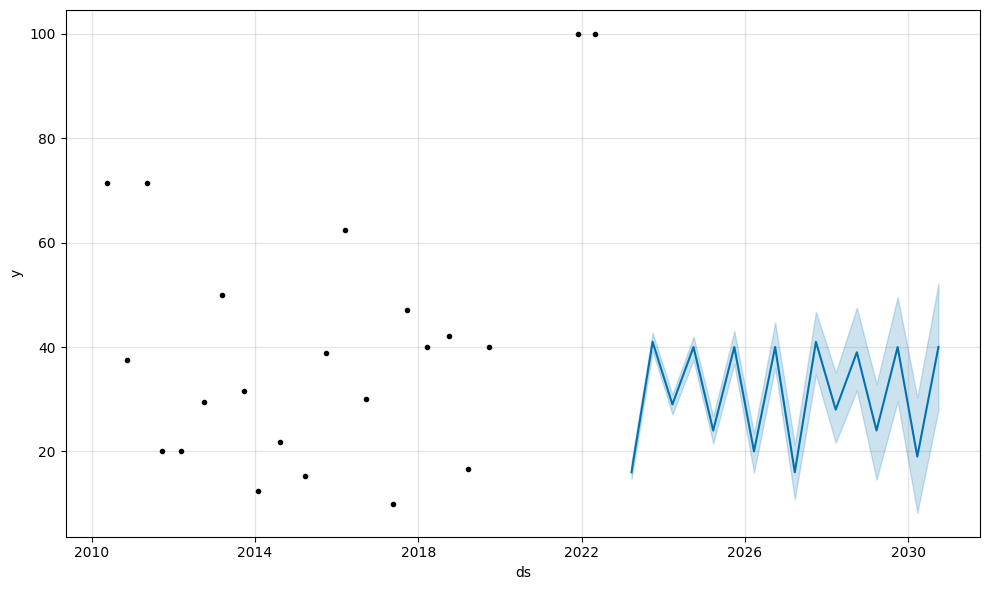

In [102]:
sjc_sed_plot = m.plot(sjc_sed_forecast)

In [103]:
perps_sed = pd.read_csv('CSV/board-exam-results - PERPS - SED.csv')

In [104]:
perps_sed['Year'] = perps_sed['Time Date'].apply(lambda x: str(x)[-4:])
perps_sed['Month'] = perps_sed['Time Date'].apply(lambda x: str(x)[-6:-4])
perps_sed['Day'] = perps_sed['Time Date'].apply(lambda x: str(x)[:-6])
perps_sed['ds'] = pd.DatetimeIndex(perps_sed['Year']+'-'+perps_sed['Month']+'-'+perps_sed['Day'])

In [105]:
perps_sed.drop(['Time Date', 'School', 'Course', 'Year', 'Month', 'Day'], axis=1, inplace=True)
perps_sed.columns = ['y', 'ds']

In [106]:
m = Prophet.Prophet(interval_width=0.95)
m.add_seasonality(name='yearly', period=365.25, fourier_order=10)
m.add_seasonality(name='semi-annual', period=365.25/2, fourier_order=10)
perps_sed_model = m.fit(perps_sed)

20:38:42 - cmdstanpy - INFO - Chain [1] start processing
20:38:43 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
# Create a list of dates for which you want to make predictions
specific_dates = [datetime(2023, 3, 24), datetime(2023, 9, 29), datetime(2024, 3, 24), datetime(2024, 9, 29), datetime(2025, 3, 24), datetime(2025, 9, 29), datetime(2026, 3, 24), datetime(2026, 9, 29), datetime(2027, 3, 24), datetime(2027, 9, 29), datetime(2028, 3, 24), datetime(2028, 9, 29), datetime(2029, 3, 24), datetime(2029, 9, 29), datetime(2030, 3, 24), datetime(2030, 9, 29)]

# Create a dataframe with those specific dates
perps_sed_future = pd.DataFrame({'ds': specific_dates})

# Get predictions for those specific dates
perps_sed_forecast = m.predict(perps_sed_future)
perps_sed_forecast['yhat'] = perps_sed_forecast['yhat'].clip(lower=0, upper=100).round()

In [108]:
perps_sed_forecast[['ds', 'yhat']]

,ds,yhat
0,2023-03-24,48.0
1,2023-09-29,65.0
2,2024-03-24,52.0
3,2024-09-29,66.0
4,2025-03-24,55.0
5,2025-09-29,71.0
6,2026-03-24,59.0
7,2026-09-29,76.0
8,2027-03-24,63.0
9,2027-09-29,80.0


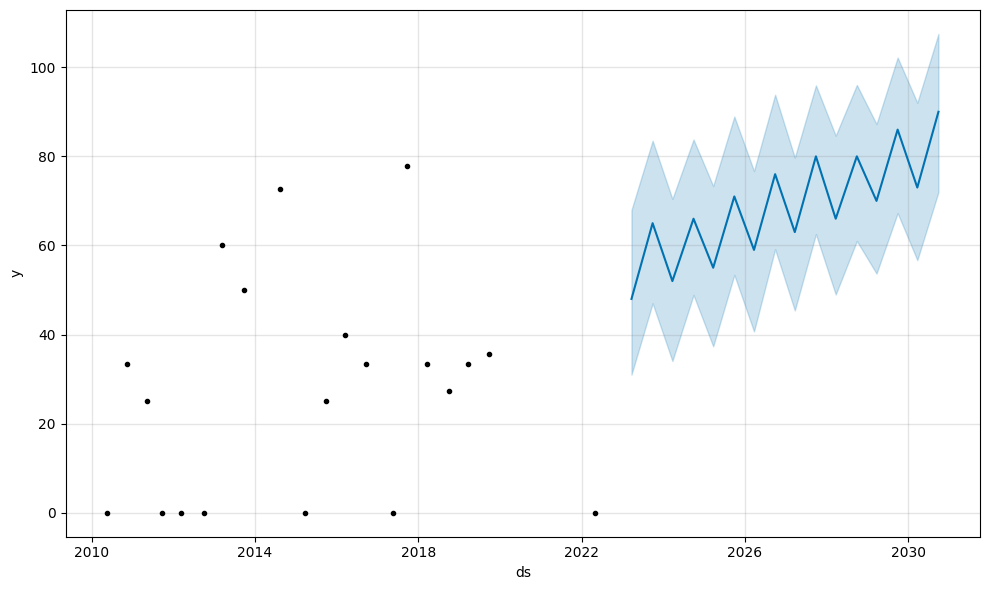

In [109]:
perps_sed_plot = m.plot(perps_sed_forecast)